## Handwritten Image Classifiation with Keras using MNIST and Fashion MNIST data


In [3]:
# Preliminaries

from __future__ import print_function

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import fashion_mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#look at the image
x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# look at the training y data 
y_train[333]

8

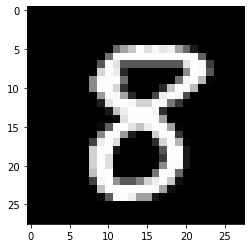

In [8]:
# look at image of x_train
plt.imshow(x_train[333], cmap='Greys_r')

In [9]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [10]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

#cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [11]:
# convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [12]:
# build a model with two fully connected layers
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)))
model_1.add(tf.keras.layers.Dropout(0.5))
model_1.add(tf.keras.layers.Dense(64, activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.5))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
## print the summary of the built model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case to multiclass case

In [15]:
# fit model_1

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 1s 1ms/step - loss: 0.8941 - accuracy: 0.7142 - val_loss: 0.2741 - val_accuracy: 0.9213
Epoch 2/30
469/469 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8627 - val_loss: 0.2214 - val_accuracy: 0.9367
Epoch 3/30
469/469 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8835 - val_loss: 0.1980 - val_accuracy: 0.9433
Epoch 4/30
469/469 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8974 - val_loss: 0.1876 - val_accuracy: 0.9483
Epoch 5/30
469/469 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.9036 - val_loss: 0.1811 - val_accuracy: 0.9493
Epoch 6/30
469/469 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.9075 - val_loss: 0.1684 - val_accuracy: 0.9548
Epoch 7/30
469/469 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.9103 - val_loss: 0.1725 - val_accuracy: 0.9548
Epoch 

In [16]:
## use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18336272239685059
Test accuracy: 0.963100016117096


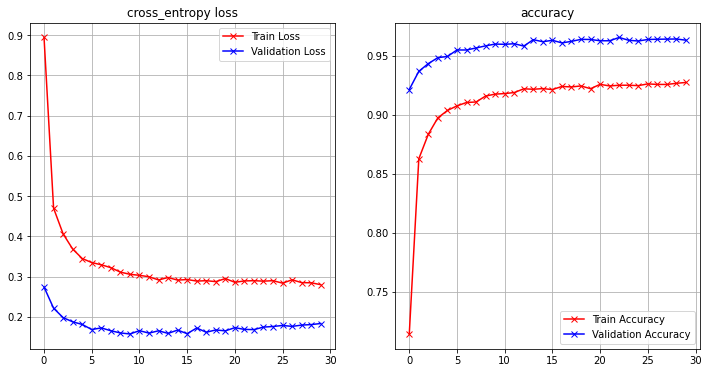

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

In [1]:
# reshape datya back to 28 * 28
x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

NameError: name 'np' is not defined

In [19]:
# model_2 requires input of 32 X 32

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [20]:
# Convolutional model requires input to be of 3 dimensions

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape
print(y_train.shape, x_train.shape)
x_train[0].shape

(60000, 10) (60000, 32, 32, 1)


(32, 32, 1)

In [21]:
model_2 = tf.keras.Sequential()

#convolution 1
model_2.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', padding = "valid", strides=(1, 1), input_shape=x_train[0].shape))

#maxpooling 1
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model_2.add(tf.keras.layers.MaxPooling2D())

#convolution 2
model_2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh', padding = "valid", strides=(1, 1)))

#maxpooling 2
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model_2.add(tf.keras.layers.MaxPooling2D())

## Flatten
model_2.add(tf.keras.layers.Flatten())

#fully connected 1
model_2.add(tf.keras.layers.Dense(units = 128,activation='tanh'))

#fully connected 2
model_2.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))

model_2.add(tf.keras.layers.Dense(units = 10, activation='softmax'))


learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=learning_rate),
             metrics=['accuracy'])


batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1990 - accuracy: 0.9442 - val_loss: 0.0822 - val_accuracy: 0.9737
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0649 - accuracy: 0.9804 - val_loss: 0.0498 - val_accuracy: 0.9840
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0300 - val_accuracy: 0.9901

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

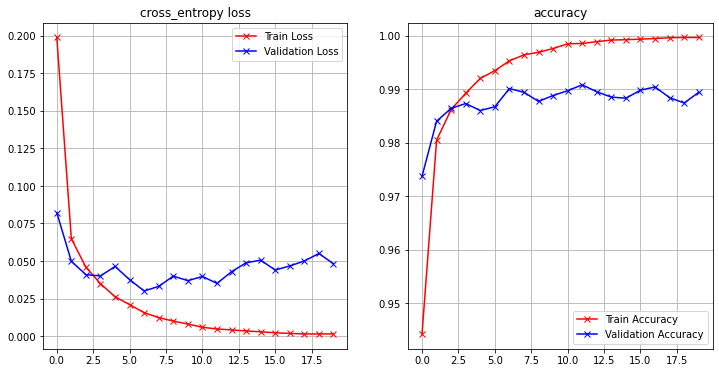

In [22]:
model_2.summary()

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

### We will perform similar tasks for Fashion MNIST dataset. 

Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [179]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [180]:
x_train[0].shape

(28, 28)

In [181]:
# look at a particular example
x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [182]:
#corresponding label 
y_train[333]

8

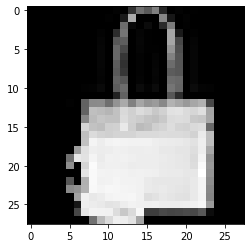

In [183]:
# image
plt.imshow(x_train[333], cmap='Greys_r')

In [184]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [185]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

##  must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [186]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Reperforming the earlier preprocessing methods

In [187]:
# reshape it back to 28 * 28

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [188]:
#increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [193]:
# add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape
#x_train[0].shape

(32, 32, 1)

###  Training on Fashion MNIST 


In [194]:
model_3 = tf.keras.Sequential()

## Flatten
model_3.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))

#fully connected 1
model_3.add(tf.keras.layers.Dense(units = 128,activation='relu'))

#fully connected 2
model_3.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

learning_rate = .001
model_3.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=learning_rate),
             metrics=['accuracy'])


batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 1s 1ms/step - loss: 0.5823 - accuracy: 0.7960 - val_loss: 0.4772 - val_accuracy: 0.8326
Epoch 2/30
469/469 [==============================] - 0s 951us/step - loss: 0.4090 - accuracy: 0.8532 - val_loss: 0.4108 - val_accuracy: 0.8541
Epoch 3/30
469/469 [==============================] - 0s 949us/step - loss: 0.3617 - accuracy: 0.8690 - val_loss: 0.4038 - val_accuracy: 0.8530
Epoch 4/30
469/469 [==============================] - 0s 961us/step - loss: 0.3348 - accuracy: 0.8780 - val_loss: 0.3750 - val_accuracy: 0.8656
Epoch 5/30
469/469 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8840 - val_loss: 0.3745 - val_accuracy: 0.8646
Epoch 6/30
469/469 [==============================] - 0s 963us/step - loss: 0.2995 - accuracy: 0.8901 - val_loss: 0.3655 - val_accuracy: 0.8705
Epoch 7/30
469/469 [==============================] - 0s 961us/step - loss: 0.2860 - accuracy: 0.8953 - val_loss: 0.3790 - val_accuracy: 0.8

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.3882392942905426
Test accuracy: 0.8849999904632568


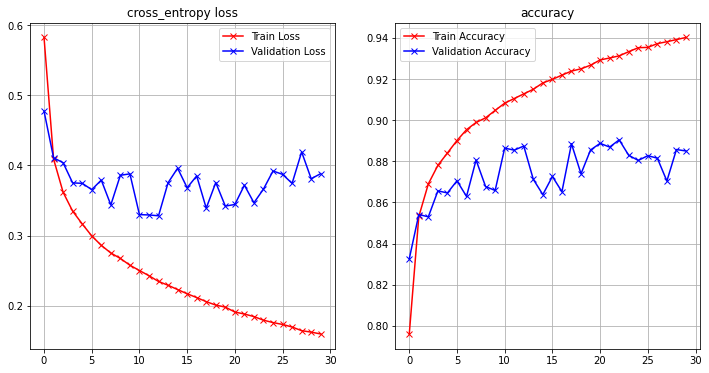

In [195]:
model_3.summary()

score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)